<a href="https://colab.research.google.com/github/mangare91/Variant-Gene-Drug-Disease-Relation/blob/master/QSARCOVID4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Install PyCaret**

In [1]:
! pip install pycaret

Input Features¶

Acetlycholinesterase data set has 881 input features and 1 output variable (pIC50 values) Model uses these unqiue fingerprints to determine which parts (functional groups) are essential to design a potent drug

## **2. Read in dataset**

In [2]:
import pandas as pd

In [3]:
final_dataset = pd.read_csv('coronavirus_bioactivity_data_pIC50_pubchem_fp.csv')
dataset=final_dataset

In [4]:
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.142668
1,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.026872
2,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.869666
3,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.882397
4,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.698970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,1,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.675718
82,1,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.644548
83,1,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.412289
84,1,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.841638


In [5]:
X = dataset.drop('pIC50', axis=1).copy()
y = dataset.pIC50.copy()

In [6]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [7]:
X.shape

(86, 185)

In [8]:
y

0     5.142668
1     5.026872
2     4.869666
3     4.882397
4     5.698970
        ...   
81    4.675718
82    3.644548
83    4.412289
84    4.841638
85    4.675718
Name: pIC50, Length: 86, dtype: float64

## **3. Model Building**

### **3.1. Model Setup**

In [9]:
from pycaret.regression import *

In [10]:
model = setup(data = dataset, target = 'pIC50', train_size=0.8, silent=True)

,Description,Value
0,session_id,7171
1,Target,pIC50
2,Original Data,"(86, 882)"
3,Missing Values,False
4,Numeric Features,0
5,Categorical Features,881
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(68, 617)"


### **3.2. Model comparison**

Subsequent blocks of codes here will be using the ``training set`` (the 80% subset) for model building.

In [11]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,0.3779,3.389000e-01,0.5464,9.070000e-01,0.0863,0.0718,0.099
gbr,Gradient Boosting Regressor,0.4478,4.451000e-01,0.6043,8.837000e-01,0.1052,0.1016,0.081
rf,Random Forest Regressor,0.4430,5.425000e-01,0.6379,8.652000e-01,0.1134,0.0965,0.466
et,Extra Trees Regressor,0.4737,5.358000e-01,0.6736,8.557000e-01,0.1142,0.1030,0.464
catboost,CatBoost Regressor,0.5350,5.718000e-01,0.6921,8.543000e-01,0.1330,0.1551,6.782
xgboost,Extreme Gradient Boosting,0.4757,5.957000e-01,0.6902,8.529000e-01,0.1288,0.1269,0.316
dt,Decision Tree Regressor,0.4964,5.802000e-01,0.7191,8.385000e-01,0.1100,0.0966,0.022
knn,K Neighbors Regressor,0.5528,6.708000e-01,0.7766,8.289000e-01,0.1555,0.1534,0.071
br,Bayesian Ridge,0.5607,6.691000e-01,0.7380,8.262000e-01,0.1611,0.1844,0.032
lightgbm,Light Gradient Boosting Machine,0.6620,7.256000e-01,0.8193,8.097000e-01,0.1704,0.2209,0.043


AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=7171)

### **3.3. Model Creation**

In [12]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.5272,0.3630,0.6025,0.8320,0.0989,0.1087
1,0.8745,2.3625,1.5371,0.5478,0.3022,0.1513
2,0.3452,0.2274,0.4769,0.9391,0.0844,0.0973
3,0.7934,1.1991,1.0950,0.6783,0.1635,0.1313
4,0.3807,0.4337,0.6585,0.8792,0.1257,0.0893
5,0.2462,0.0980,0.3130,0.9737,0.0824,0.1129
6,0.3476,0.2647,0.5145,0.9531,0.0703,0.0639
7,0.3450,0.2194,0.4684,0.9416,0.0870,0.0844
8,0.2550,0.1000,0.3163,0.9474,0.0556,0.0550
9,0.3153,0.1576,0.3970,0.9601,0.0639,0.0709


### **3.4. Model Tuning**

The learning parameters are subjected to optimization at this phase. Here, 50 iterations is used for the optimization process and the fitness function is the Mean Absolute Error (MAE) which is the performance metric used to judge at which learning parameter settings are optimal. 

In [13]:
tuned_rf = tune_model(rf, n_iter = 50, optimize = 'mae')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4445,0.3674,0.6062,0.8299,0.1018,0.0917
1,1.0688,4.0792,2.0197,0.2192,0.4868,0.1774
2,0.1646,0.0614,0.2478,0.9835,0.0409,0.0333
3,0.6758,1.1369,1.0663,0.6950,0.1575,0.1045
4,0.7086,2.1514,1.4668,0.4009,0.4057,0.1489
5,0.1190,0.0419,0.2047,0.9887,0.0351,0.0251
6,0.5774,0.8679,0.9316,0.8462,0.2075,0.1131
7,0.2608,0.2120,0.4604,0.9436,0.0865,0.0627
8,0.1329,0.0283,0.1684,0.9851,0.0296,0.0288
9,0.3547,0.3358,0.5795,0.9150,0.0919,0.0654


In [14]:
print(tuned_rf)

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mae',
                      max_depth=8, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.02,
                      min_impurity_split=None, min_samples_leaf=6,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=290, n_jobs=-1, oob_score=False,
                      random_state=7171, verbose=0, warm_start=False)


### **4. Model Analysis**

#### **4.1. Plot Models**
In this tutorial, we are performing regression and so further details of the regression plots are available at https://pycaret.org/plot-model/.

**Residuals Plot**

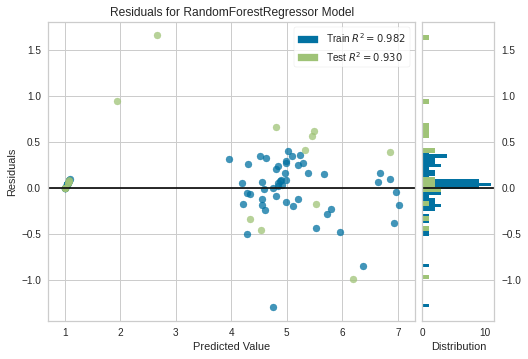

In [15]:
plot_model(rf, 'residuals')

**Prediction Error Plot**

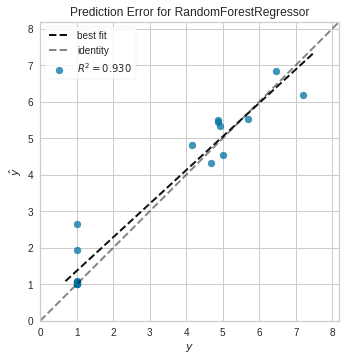

In [16]:
plot_model(rf, 'error')

**Cooks Distance Plot**

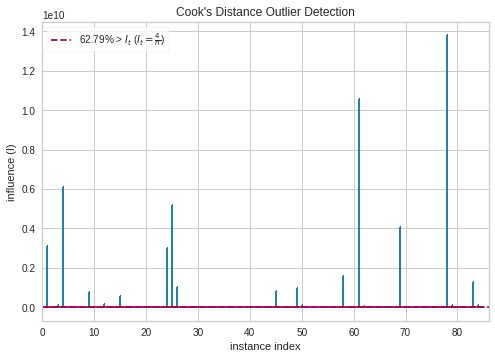

In [17]:
plot_model(rf, 'cooks')

**Recursive Feature Selection**

In [ ]:
plot_model(rf, 'rfe')

IntProgress(value=0, description='Processing: ', max=5)

**Learning Curve**

In [ ]:
plot_model(rf, 'learning')

**Validation Curve**

In [ ]:
plot_model(rf, 'vc')

**Manifold Learning**

In [ ]:
plot_model(rf, 'manifold')

**Feature Importance**

In [ ]:
plot_model(rf, 'feature')

**Model Hyperparameter**

The hyperparameter of the learning model is displayed using the ``parameter`` argument in inside the ``plot_model()`` function.

In [ ]:
plot_model(rf, 'parameter')

Here, the hyperparameter of the tuned model is displayed below.

In [ ]:
plot_model(tuned_rf, 'parameter')

**Show all plots**

The ``evaluate_model()`` displays all available plots here.

In [ ]:
evaluate_model(tuned_rf)

#### **4.2. Model Interpretaion**

The ``interpret_model()`` function of PyCaret leverages the use of the SHAP library to produce stunning plots for depicting the **SHAP (SHapley Additive exPlanations)** values that was originally proposed by Lundberg and Lee in 2016.$^5$ In a nutshell, SHAP plots adds interpretability to constructed models so that the contribution of each features to the prediction can be elucidated.

**Summary Plot**

In [ ]:
interpret_model(rf)

**Correlation Plot**

In [ ]:
interpret_model(rf, plot = 'correlation')

**Reason Plot at Observation Level**

The *Reason Plot at Observation Level* as called by PyCaret is better known as the **force plot** and this plot essentially describes the ***push and pull effect*** that each individual features has on the **base value** that eventually leads to the predicted **output value**.

In [ ]:
interpret_model(rf, plot = 'reason', observation = 10)

### **6.6. External Testing**

We will now apply the trained model (built with 80% subset) to evaluate on the so-called **"hold-out"** testing set (the 20% subset) that serves as the unseen data.

In [ ]:
prediction_holdout = predict_model(rf)

In [ ]:
prediction_holdout.head()

---

## **Reference**

1. John S. Delaney. [ESOL:  Estimating Aqueous Solubility Directly from Molecular Structure](https://pubs.acs.org/doi/10.1021/ci034243x). ***J. Chem. Inf. Comput. Sci.*** 2004, 44, 3, 1000-1005.

2. Pat Walters. [Predicting Aqueous Solubility - It's Harder Than It Looks](http://practicalcheminformatics.blogspot.com/2018/09/predicting-aqueous-solubility-its.html). ***Practical Cheminformatics Blog***

3. Bharath Ramsundar, Peter Eastman, Patrick Walters, and Vijay Pande. [Deep Learning for the Life Sciences: Applying Deep Learning to Genomics, Microscopy, Drug Discovery, and More](https://learning.oreilly.com/library/view/deep-learning-for/9781492039822/), O'Reilly, 2019.

4. [Supplementary file](https://pubs.acs.org/doi/10.1021/ci034243x) from Delaney's ESOL:  Estimating Aqueous Solubility Directly from Molecular Structure.

5. Scott M. Lundberg and Su-In Lee. [A Unified Approach to Interpreting Model Predictions](https://papers.nips.cc/paper/7062-a-unified-approach-to-interpreting-model-predictions), A Unified Approach to Interpreting Model Predictions, ***Advances in Neural Information Processing Systems 30 (NIPS 2017)***, 2017.